uni # TODO: Replace this with your UNI

# MNIST Sign Language

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [2]:
class SignLanguage:
    def __init__(self):
        self.model = None

        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()

    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """

        # TODO: Create a Sequential model
        model = Sequential()
        num_classes = getattr(self, "num_classes", 26)

        model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
        model.add(MaxPooling2D((2, 2)))

        model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
        model.add(MaxPooling2D((2, 2)))

        model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
        model.add(MaxPooling2D((2, 2)))

        model.add(Flatten())
        model.add(Dropout(0.3))
        model.add(Dense(128, activation="relu"))
        model.add(Dropout(0.3))

        model.add(Dense(num_classes, activation="softmax"))

        model.compile(
            optimizer="adam",
            loss=keras.losses.categorical_crossentropy,
            metrics=["accuracy"],
        )

        self.model = model

    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)

        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        # TODO : split into training and validation set
        # TODO : reshape each example into a 2D image (28, 28, 1)

        images = images.astype("float32") / 255.0
        images = images.reshape((-1, 28, 28, 1))

        labels = labels.astype(int)

        min_label = int(labels.min())
        if min_label != 0:
          labels = labels - min_label

        self.num_classes = int(labels.max()) + 1
        labels = keras.utils.to_categorical(labels, num_classes=self.num_classes)

        x_train, x_test, y_train, y_test = train_test_split(
          images,
          labels,
          test_size=0.2,
          random_state=42,
          stratify=labels.argmax(axis=1),
        )

        self.data = {
          "train": (x_train, y_train),
          "test": (x_test, y_test),
        }
        self.create_model()

    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.

        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """
        if self.model is None:
          self.create_model()

        x_train, y_train = self.data["train"]
        x_test, y_test = self.data["test"]

        history = self.model.fit(
          x_train,
          y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=verbose,
          validation_data=(x_test, y_test),
        )
        return history

    def predict(self, data):
        """
        Use the trained model to predict labels for test data.

        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """

        # Don't forget to normalize the data in the same way as training data
        # self.model.predict() and np.argmax( , axis=1) might help

        return np.zeros(data.shape[0])

    def visualize_data(self, data):
        """
        Visualizing the hand gestures

        :param data: numpy array of images
        """
        if data is None: return

        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object

        :param history: return value from model.fit()
        """
        if history is None: return

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [3]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [4]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


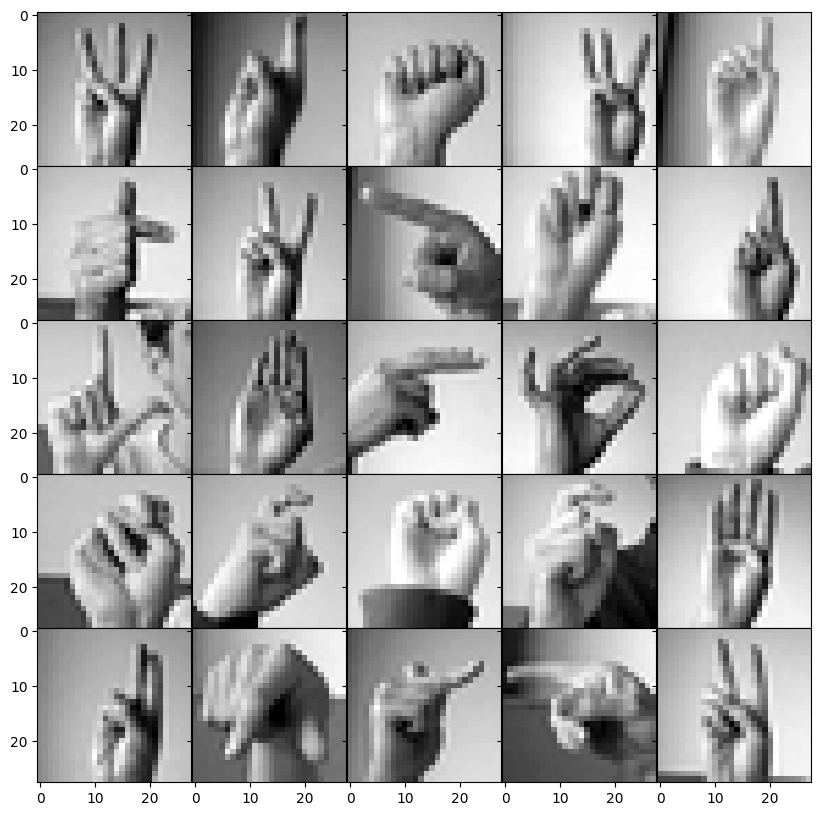

In [5]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.1255 - loss: 2.9110 - val_accuracy: 0.7935 - val_loss: 0.7640
Epoch 2/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7270 - loss: 0.8249 - val_accuracy: 0.9619 - val_loss: 0.1669
Epoch 3/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8940 - loss: 0.3093 - val_accuracy: 0.9851 - val_loss: 0.0826
Epoch 4/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9465 - loss: 0.1667 - val_accuracy: 0.9982 - val_loss: 0.0252
Epoch 5/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9678 - loss: 0.1052 - val_accuracy: 1.0000 - val_loss: 0.0107
Epoch 6/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9781 - loss: 0.0725 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 7/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9854 - loss: 0.0466 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 8/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9868 - loss: 0.0410 - val_accuracy: 

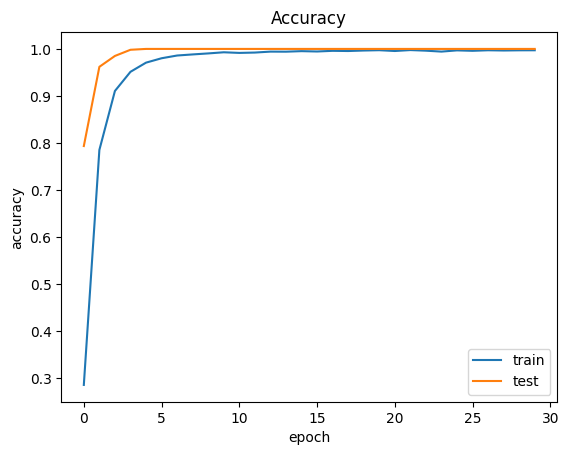

In [6]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [7]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

0.04615170105967652
